# Enemy Survivability 

How long it takes for each weapon to kill an enemy.

## Setting Up

In [1]:
import math
import pandas as pd

%run weapon_full_data.ipynb

## Weapon Damages by Alien

In [2]:
weapon_damages_aliens = weapon_data_aliens.groupby(["weapon", "alien"]).mean()
weapon_damages_aliens = weapon_damages_aliens[["penetrating_damage_expected"]]
weapon_damages_aliens = weapon_damages_aliens.rename(columns={"penetrating_damage_expected": "turn_damage"})
weapon_damages_aliens = weapon_damages_aliens.sort_values(by=["turn_damage"])

## Alien Damage Lists

### Averages

In [3]:
weapon_damages_average = weapon_damages_aliens.groupby(["weapon"]).mean()
weapon_damages_average = weapon_damages_average.sort_values(by=["turn_damage"])

In [4]:
weapon_damages_max = weapon_damages_aliens.groupby(["weapon"]).max()
weapon_damages_max = weapon_damages_max.sort_values(by=["turn_damage"])

In [5]:
average_damages_expected = weapon_damages_max.merge(weapon_damages_average, on="weapon")
average_damages_expected = average_damages_expected.rename(columns={"turn_damage_x": "max", "turn_damage_y": "average"})
average_damages_expected = average_damages_expected.sort_values(by=["average"])
average_damages_expected

,max,average
weapon,,
jet_harpoon,2.612500,2.612500
dart_gun,9.817500,9.817500
magna_blast_grenade,15.193750,15.193750
particle_disturbance_grenade,22.343750,22.343750
magna_pack_explosive,33.068750,33.068750
hidro_jet_cannon,33.504167,33.504167
gas_cannon,33.515625,33.515625
heavy_gauss,38.981250,38.981250
sonic_pulser,40.218750,40.218750


Text(0, 0.5, 'Damage')

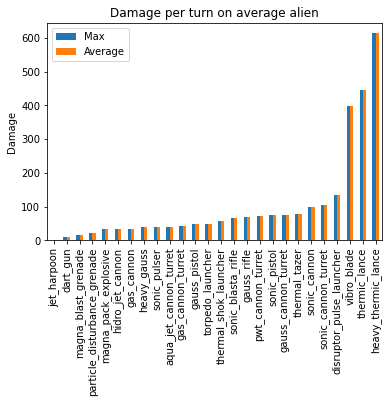

In [6]:
ax = average_damages_expected.plot.bar(title="Damage per turn on average alien", legend=False)
ax.legend(["Max", "Average"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Damage")

### Damage Per Time Unit

In [7]:
weapon_damages_per_tu_targets_average = weapon_data_aliens[["weapon", "penetrating_damage_per_time_unit"]]
weapon_damages_per_tu_targets_average = weapon_damages_per_tu_targets_average.groupby(["weapon"]).mean()

In [8]:
weapon_damages_per_tu_targets_max = weapon_data_aliens[["weapon", "penetrating_damage_per_time_unit"]]
weapon_damages_per_tu_targets_max = weapon_damages_per_tu_targets_max.groupby(["weapon"]).max()

In [9]:
weapon_damages_per_tu_targets_expected = weapon_damages_per_tu_targets_max.merge(weapon_damages_per_tu_targets_average, on="weapon")
weapon_damages_per_tu_targets_expected = weapon_damages_per_tu_targets_expected.rename(columns={"penetrating_damage_per_time_unit_x": "max", "penetrating_damage_per_time_unit_y": "average"})
weapon_damages_per_tu_targets_expected = weapon_damages_per_tu_targets_expected.sort_values(by=["average"])
weapon_damages_per_tu_targets_expected

,max,average
weapon,,
jet_harpoon,0.051724,0.051724
dart_gun,0.242857,0.242857
magna_blast_grenade,0.566667,0.566667
hidro_jet_cannon,0.693548,0.693548
particle_disturbance_grenade,0.833333,0.833333
gas_cannon_turret,0.929204,0.929204
gas_cannon,0.942029,0.942029
aqua_jet_cannon_turret,0.958333,0.958333
gauss_pistol,1.071429,1.071429


Text(0, 0.5, 'Ratio')

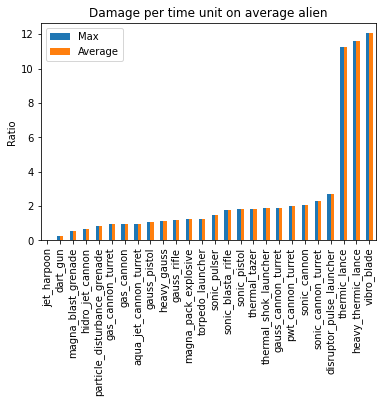

In [10]:
ax = weapon_damages_per_tu_targets_expected.plot.bar(title="Damage per time unit on average alien", legend=False)
ax.legend(["Max", "Average"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Ratio")

### Hits to Kill

In [11]:
hits_to_kill_average = weapon_data_aliens[["weapon", "hits_to_kill"]]
hits_to_kill_average = hits_to_kill_average[hits_to_kill_average["hits_to_kill"] < 200]
hits_to_kill_average = hits_to_kill_average.groupby(["weapon"]).mean()
hits_to_kill_average["hits_to_kill"] = hits_to_kill_average.apply(lambda x: math.ceil(x["hits_to_kill"]), axis=1)
hits_to_kill_average = hits_to_kill_average.sort_values(by=["hits_to_kill"])

Text(0, 0.5, 'Hits')

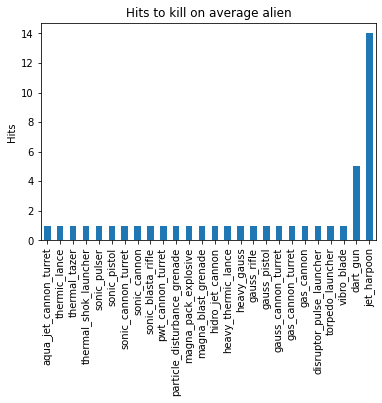

In [12]:
ax = hits_to_kill_average.plot.bar(title="Hits to kill on average alien", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits")

### Expected Kills in a Turn

In [13]:
expected_kills = weapon_data_aliens[["weapon", "expected_kills"]]
expected_kills = expected_kills.groupby(["weapon"]).mean()
expected_kills["expected_kills"] = expected_kills.apply(lambda x: math.ceil(x["expected_kills"]), axis=1)
expected_kills = expected_kills.sort_values(by=["expected_kills"])

Text(0, 0.5, 'Kills')

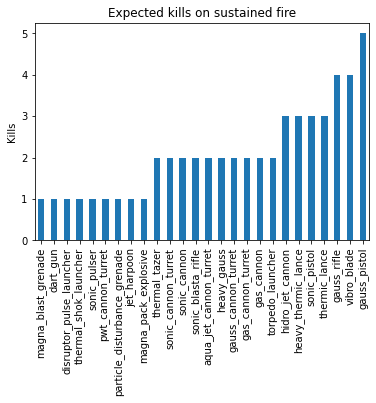

In [14]:
ax = expected_kills.plot.bar(title="Expected kills on sustained fire", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Kills")